<a href="https://colab.research.google.com/github/Jhorley666/Bibavix/blob/master/attractor_network_hebb_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(0.0, 6.0, 0.0, 2.0)

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


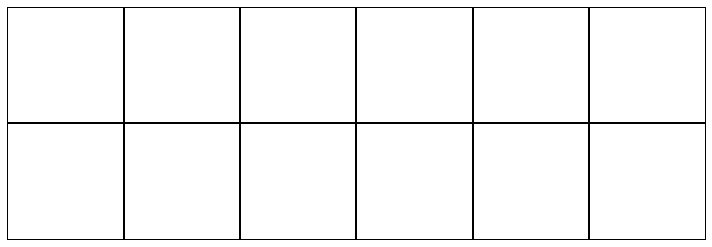

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx

N = 6
# make an empty data set
data = np.ones((1, N)) * np.nan
# fill in some fake data
#for j in range(3)[::-1]:
#    data[N//2 - j : N//2 + j +1, N//2 - j : N//2 + j +1] = j
# make a figure + axes

fig, ax = plt.subplots(1, 1, tight_layout=True, figsize=(10,10))
# make color map
my_cmap = matplotlib.colors.ListedColormap(['r', 'g', 'b'])
# set the 'bad' values (nan) to be white and transparent
my_cmap.set_bad(color='w', alpha=0)
# draw the grid
for x in range(N + 1):
    ax.axhline(x, lw=2, color='k', zorder=5)
    ax.axvline(x, lw=2, color='k', zorder=5)
# draw the boxes
ax.imshow(data, interpolation='none', cmap=my_cmap, extent=[0, N, 0, 2], zorder=0)
# turn off the axis labels
ax.axis('off')

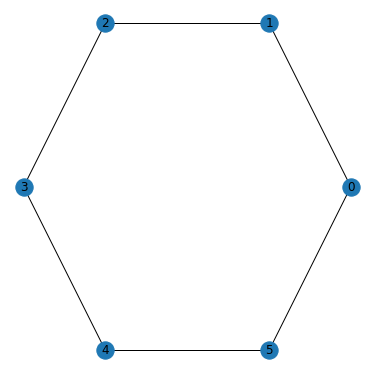

In [0]:
plt.figure(figsize=(5,5))

g = nx.watts_strogatz_graph(N, 2, p=0)
pos = nx.circular_layout(g)

nx.draw(g, pos=pos, with_labels=True)

In [0]:
from scipy.stats import binom

np.random.seed(123)

N = 6  # number of nodes
k = 2  # avg. number of connections per node

# Random pattern
x = binom.rvs(n=1, p=0.5, size=N) * 2 - 1
x

array([ 1, -1, -1,  1,  1, -1])

In [0]:
# C := Network structure (connectivity topology)
C = np.zeros((N,k), dtype='int')
for i in range(6):
    for ki in range(k//2):
        C[i, ki] = i + (ki+1)
        C[i, ki+k//2] = i - (ki + 1)
C[np.where(C < 0)] = C[np.where(C < 0)] + N
C[np.where(C >= N)] = C[np.where(C >= N)] - N
C

array([[1, 5],
       [2, 0],
       [3, 1],
       [4, 2],
       [5, 3],
       [0, 4]])

In [0]:
W = np.array([np.zeros(len(ci)) for ci in C])
W, x

(array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]), array([ 1, -1, -1,  1,  1, -1]))

In [0]:
W[3] = W[3] + x[C[3]] * x[3]
W[3]

array([ 1., -1.])

In [0]:
np.random.seed(123)
W = np.array([binom.rvs(n=1, p=0.5, size=len(ci))*2-1 for ci in C])
W

array([[ 1, -1],
       [-1,  1],
       [ 1, -1],
       [ 1,  1],
       [-1, -1],
       [-1,  1]])

In [0]:
x

array([1, 0, 0, 1, 1, 0])

In [0]:
# activation function on neuron input
x1 = [int(np.sum(x[C[nxi]]*W[nxi]) >= 0) for nxi in range(N)]  
x1

[1, 1, 1, 1, 0, 1]

In [0]:
nxi = 4

int(np.sum(x[C[nxi]]*W[nxi]) >= 0)

0

In [0]:
np.mean(x), np.mean(x1)

(0.5, 0.8333333333333334)

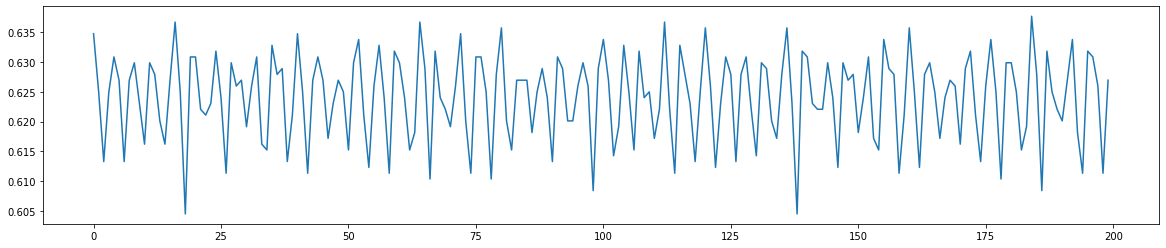

In [0]:
N = 1024  # number of nodes
k = 4  # avg. number of connections per node

# Initial state, t=0
x = binom.rvs(n=1, p=0.5, size=N)

# C := Network structure (connectivity topology)
C = np.zeros((N,k), dtype='int')
for i in range(N):
    for ki in range(k//2):
        C[i, ki] = i + (ki+1)
        C[i, ki+k//2] = i - (ki + 1)
C[np.where(C < 0)] = C[np.where(C < 0)] + N
C[np.where(C >= N)] = C[np.where(C >= N)] - N

W = np.array([binom.rvs(n=1, p=0.5, size=len(ci))*2-1 for ci in C])

A = [np.mean(x)]

for i in range(1000):
    # network update
    x = np.array([int(np.sum(x[C[nxi]]*W[nxi]) >= 0) for nxi in range(N)])
    A += [np.mean(x)]
    
plt.figure(figsize=(20,4))
plt.plot(A[-200:])

In [0]:
k = 2
N = 10
p = k / N
print(N, k, p)

[binom.rvs(n=1, p=p, size=N) for i in range(10)]



10 2 0.2


[array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0])]

In [0]:
2*np.log(N)/N

0.46051701859880917

(0.0, 1.0)

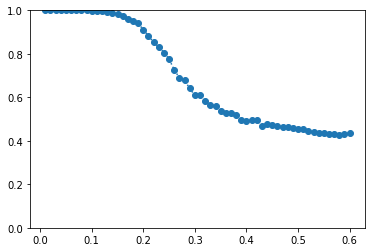

In [3]:
from scipy.stats import binom
np.random.seed(123)
N = 100000 #number of nodes
k = 100 # avg. number of connections per node
P = 60 # patterns to learn

# C := Network structure (connectivity topology)
C = np.zeros((N, k), dtype='int')
for i in range(N):
  for ki in range(k//2):
    C[i, ki] = i + (ki+1)
    C[i, ki+k//2] = i - (ki+1)
C[np.where(C<0)] = C[np.where(C<0)] + N
C[np.where(C>=N)] = C[np.where(C>=N)] - N

W = np.array([np.zeros(len(ci)) for ci in C])
X = binom.rvs(n=1, p=0.5, size=(P, N)) * 2 - 1
M = []

#for each pattern x
for pi, x in enumerate(X):
  for i in range(N):
    W[i] = W[i] + x[C[i]] * x[i] 
  xt = np.copy(x)
  m = [np.sum(x * x) /N]
  for ti in range(100):
    xt = np.array([int(np.sum(xt[C[nxi]]*W[nxi]) >= 0)*2-1 for nxi in range(N)])
    m += [np.sum(x*xt)/N]
    if m[-1] == m[-2]:
      break
  M += [m[-1]]
plt.plot(np.array(range(1, P+1))/k, M, ':o')
plt.ylim((0, 1))


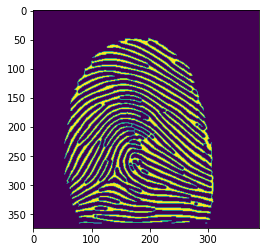

In [0]:
fp = np.loadtxt('017_6', dtype='int')
plt.imshow(fp)